# We are building a model to detect chances of Admission in a University.  

# We will start by importing certain python libraries, then import data and inspect for any missing values.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#this command is used to get all the visualizations in the same working window

In [3]:
df = pd.read_csv('Admission_Predict_Ver1.1.csv')

# We will check the head of data, describe the data and derive various info

In [4]:
df.head(3)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [6]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


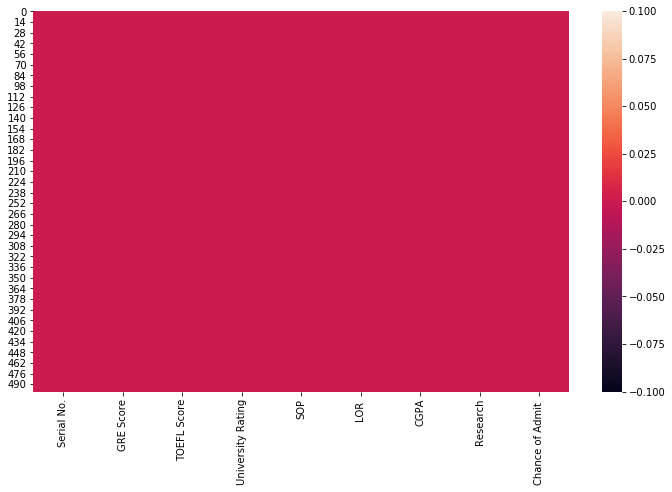

In [7]:
plt.figure(figsize=(12,7))
sns.heatmap(df.isnull())

# This will give us any spot with missing Values.

# This way we know that there are no missing values and there is no need of conversion.

# Now we will do some Exploratory Analysis  
# with the help of Matplotlib and Seaborn

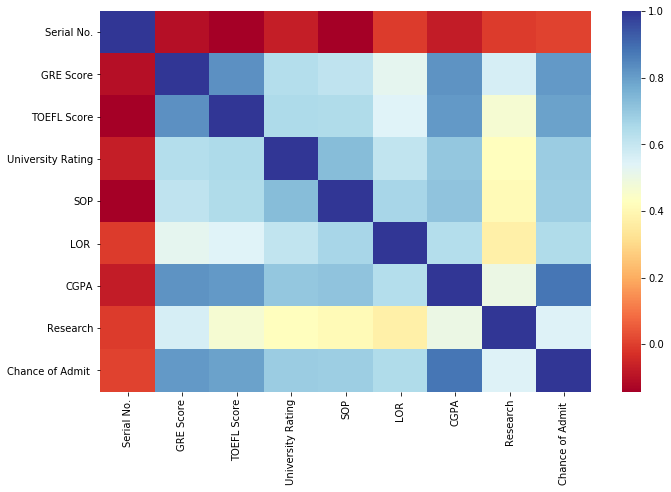

In [8]:
plt.figure(figsize=(11,7))
sns.heatmap(df.corr(),cmap='RdYlBu')

# The above heatmap clearly shows the values that are highly correlated to Chace of Admit
# These are CGPA, TOEFL Score, GRE Score

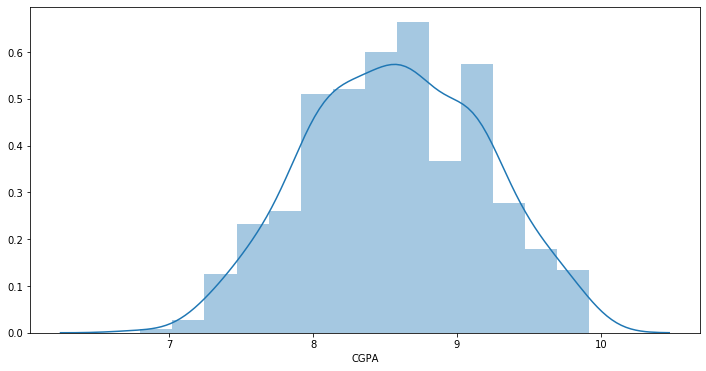

In [12]:
plt.figure(figsize=(12,6))
sns.distplot(df['CGPA'])

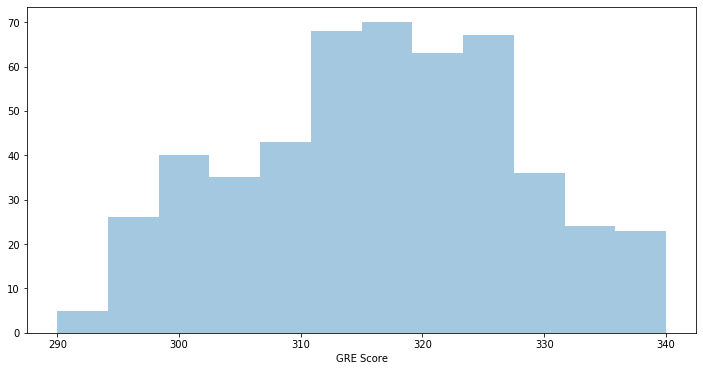

In [13]:
plt.figure(figsize=(12,6))
sns.distplot(df['GRE Score'],kde=False)

# The jointplots below show how CGPA, GRE Score and TOFEL Score relate to each other

<Figure size 648x504 with 0 Axes>

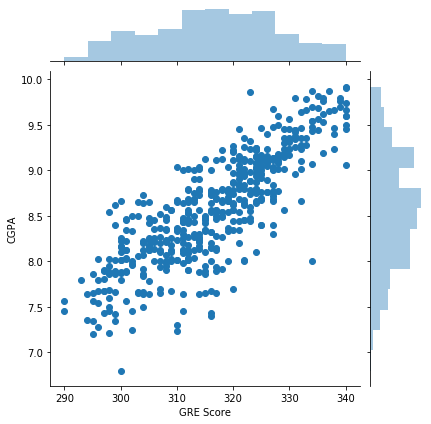

In [14]:
sns.jointplot(x='GRE Score',y='CGPA',data= df)

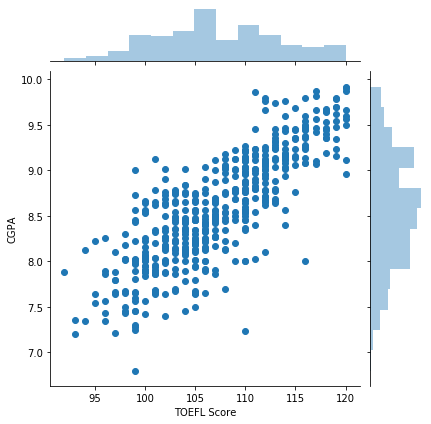

In [15]:
sns.jointplot(x='TOEFL Score', y='CGPA',data = df)

# Once we are clear with the Dependents we will go ahead and choose X(Dependent Variables) and y(outcome)

In [16]:
X = df.drop('Chance of Admit ',axis = 1)

In [17]:
y = df['Chance of Admit ']

# We will split the data into train and test set.

In [18]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 101)

In [32]:
X_train = X_train.drop('Serial No.', axis=1)

In [33]:
X_test = X_test.drop('Serial No.', axis=1)

# After the train test split we need to normalize the data to make it easier for our model to work on

In [34]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
scaler = MinMaxScaler()

In [36]:
X_train = scaler.fit_transform(X_train)

In [37]:
X_test = scaler.transform(X_test)

In [38]:
X_train

array([[0.16      , 0.22222222, 0.        , ..., 0.5       , 0.21153846,
        0.        ],
       [0.62      , 0.66666667, 1.        , ..., 1.        , 0.84935897,
        1.        ],
       [0.52      , 0.44444444, 0.5       , ..., 0.625     , 0.61858974,
        0.        ],
       ...,
       [0.84      , 0.92592593, 1.        , ..., 1.        , 0.85576923,
        1.        ],
       [0.74      , 0.66666667, 0.75      , ..., 0.875     , 0.70512821,
        1.        ],
       [0.7       , 0.62962963, 0.75      , ..., 0.75      , 0.59935897,
        1.        ]])

# Now we go ahead and build our model with help of Tensorflow

In [39]:
import tensorflow as tf

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [41]:
model = Sequential()

model.add(Dense(21, activation='relu'))
model.add(Dropout(.5)) 
# This is our first layer with 50% dropout.

model.add(Dense(14,activation='relu'))
model.add(Dropout(.5)) 
# This is our second layer(1st hidden layer) with 50% droput.

model.add(Dense(7,activation='relu'))
model.add(Dropout(.25)) 
#This is our third layer(2nd hidden layer) with 25% dropout.

model.add(Dense(1,activation='relu')) 
# This is our final layer(output layer).

# Now we will compile the model and for loss we will check for Mean Squared Error.
model.compile(optimizer = 'adam', loss = 'mse')

In [42]:
model.fit(x = X_train,
          y =y_train,
          epochs = 128,
          verbose = 2,
          validation_split = .33,
          shuffle = True)

Epoch 1/128

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

9/9 - 0s - loss: 0.5196 - val_loss: 0.5477
Epoch 2/128
9/9 - 0s - loss: 0.5164 - val_loss: 0.5477
Epoch 3/128
9/9 - 0s - loss: 0.5161 - val_loss: 0.5477
Epoch 4/128
9/9 - 0s - loss: 0.4880 - val_loss: 0.5477
Epoch 5/128
9/9 - 0s - loss: 0.4836 - val_loss: 0.5477
Epoch 6/128
9/9 - 0s - loss: 0.4751 - val_loss: 0.5476
Epoch 7/128
9/9 - 0s - loss: 0.4684 - val_loss: 0.5463
Epoch 8/128
9/9 - 0s - loss: 0.4735 - val_loss: 0.5407
Epoch 9/128
9/9 - 0s - loss: 0.4362 - val_loss: 0.5204
Epoch 10/128


In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  168       
_________________________________________________________________
dropout (Dropout)            multiple                  0         
_________________________________________________________________
dense_1 (Dense)              multiple                  308       
_________________________________________________________________
dropout_1 (Dropout)          multiple                  0         
_________________________________________________________________
dense_2 (Dense)              multiple                  105       
_________________________________________________________________
dropout_2 (Dropout)          multiple                  0         
_________________________________________________________________
dense_3 (Dense)              multiple                  8

# Now we create a DataFrame for the model loss.
# Then we will plot the loss to check if the model works fine and there is no Underfitting or Overfitting

In [44]:
loss = pd.DataFrame(model.history.history)

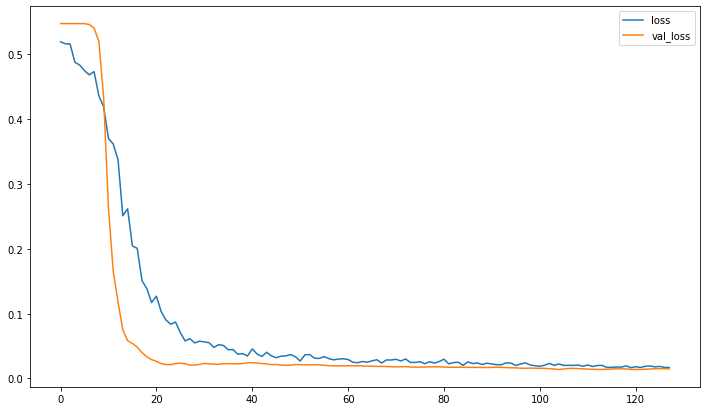

In [46]:
loss.plot(figsize=(12,7))

In [47]:
prediction = model.predict(X_test)

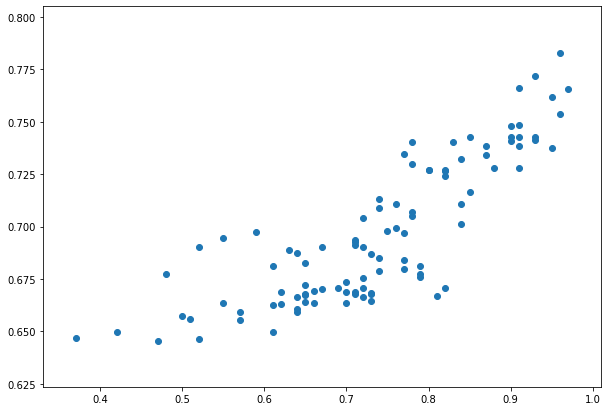

In [55]:
plt.scatter(y_test,prediction)
plt.gcf().set_size_inches((10,7))

# The scatter plot above shows how our predictions are scattered with respect to the y_test

# In order to predict the Chance of Admit for a new person we just need to convert the variables to numpy array and feed it to our model.

# Now we will try this with simple linear regression model

# First we import LinearRegression model

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
lr = LinearRegression()

# Now we will fit our training data and then compare the predictions with our y_test with help of scatterplot

In [58]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
print('Coefficients: \n' , lr.coef_)

Coefficients: 
 [0.09630528 0.08286086 0.02574855 0.00409588 0.06965886 0.36603095
 0.02144187]


In [60]:
lr_prediction = lr.predict(X_test)

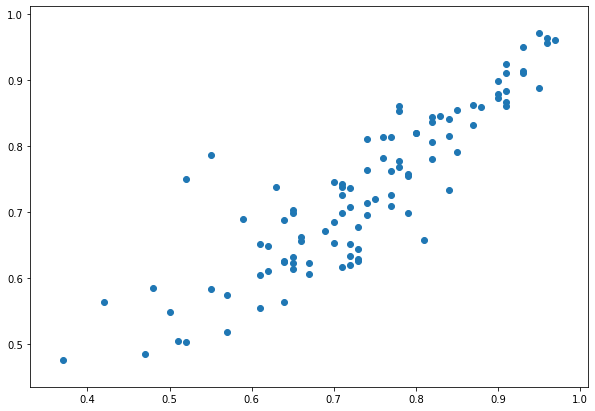

In [63]:
plt.scatter(y_test,lr_prediction)
plt.gcf().set_size_inches((10,7))

# With this scatter plot we can clearly see that our deep learning Neural model performs better than the simple Linear Regression model.